# EU Elections 2019, Italy
## Introduction
In this analysis using **pdnd-nteract** we will present some data, in chart and map forms, regarding the [**polls of the 2019 EU elections in Italy**](https://github.com/giocomai/elezioni_europee_2019_italia_csv/tree/master/scrutini).

The dataset is published by the Ministero dell'Interno and it contains the polls divided by party and province/town/polling station. To obtain clearer maps we'll analyze results at province level.

## Let's start

We will start by importing some python libraries:

In [1]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from io import StringIO
pd.options.display.html.table_schema = True
pd.set_option('display.max_rows', None)
import os

In [2]:
df = pd.read_csv(os.path.join('scrutini', 'scrutini_provincia_full.csv'))
df

pos                                      desc_lis  \
0       5                          LEGA SALVINI PREMIER   
1      12                           PARTITO DEMOCRATICO   
2       8                            MOVIMENTO 5 STELLE   
3      11                                  FORZA ITALIA   
4       7                             FRATELLI D'ITALIA   
5       1       +EUROPA - ITALIA IN COMUNE - PDE ITALIA   
6      16                                  EUROPA VERDE   
7      18                                   LA SINISTRA   
8       2                             PARTITO COMUNISTA   
9       4                            PARTITO ANIMALISTA   
10      6                         POPOLARI PER L'ITALIA   
11     17  POPOLO DELLA FAMIGLIA - ALTERNATIVA POPOLARE   
12      3                                PARTITO PIRATA   
13     10               CASAPOUND ITALIA - DESTRE UNITE   
14     14                                   FORZA NUOVA   
15     13                        AUTONOMIE PER L'EUROPA   
16      5                          LEGA SALVINI PREMIER   
17     12                           PARTITO DEMOCRATICO   
18      8                            MOVIMENTO 5 STELLE   
19     11                                  FORZA ITALIA   
20      7                             FRATELLI D'ITALIA   
21      1       +EUROPA - ITALIA IN COMUNE - PDE ITALIA   
22     16                                  EUROPA VERDE   
23     18                                   LA SINISTRA   
24      4                            PARTITO ANIMALISTA   
25      2                             PARTITO COMUNISTA   
26     17  POPOLO DELLA FAMIGLIA - ALTERNATIVA POPOLARE   
27     10               CASAPOUND ITALIA - DESTRE UNITE   
28      6                         POPOLARI PER L'ITALIA   
29      3                                PARTITO PIRATA   
30     14                                   FORZA NUOVA   
31     13                        AUTONOMIE PER L'EUROPA   
32      5                          LEGA SALVINI PREMIER   
33     12                           PARTITO DEMOCRATICO   
34      8                            MOVIMENTO 5 STELLE   
35     11                                  FORZA ITALIA   
36      7                             FRATELLI D'ITALIA   
37      1       +EUROPA - ITALIA IN COMUNE - PDE ITALIA   
38     18                                   LA SINISTRA   
39     16                                  EUROPA VERDE   
40      2                             PARTITO COMUNISTA   
41      6                         POPOLARI PER L'ITALIA   
42      4                            PARTITO ANIMALISTA   
43     10               CASAPOUND ITALIA - DESTRE UNITE   
44      3                                PARTITO PIRATA   
45     17  POPOLO DELLA FAMIGLIA - ALTERNATIVA POPOLARE   
46     14                                   FORZA NUOVA   
47     13                        AUTONOMIE PER L'EUROPA   
48      5                          LEGA SALVINI PREMIER   
49     12                           PARTITO DEMOCRATICO   
50      8                            MOVIMENTO 5 STELLE   
51     11                                  FORZA ITALIA   
52      7                             FRATELLI D'ITALIA   
53      1       +EUROPA - ITALIA IN COMUNE - PDE ITALIA   
54     16                                  EUROPA VERDE   
55     18                                   LA SINISTRA   
56      2                             PARTITO COMUNISTA   
57      4                            PARTITO ANIMALISTA   
58     10               CASAPOUND ITALIA - DESTRE UNITE   
59     17  POPOLO DELLA FAMIGLIA - ALTERNATIVA POPOLARE   
60      6                         POPOLARI PER L'ITALIA   
61      3                                PARTITO PIRATA   
62     13                        AUTONOMIE PER L'EUROPA   
63     14                                   FORZA NUOVA   
64      5                          LEGA SALVINI PREMIER   
65     12                           PARTITO DEMOCRATICO   
66     11                                  FORZA ITAL

In [3]:
df['perc'] = df['perc'].str.replace(',','.').astype(float)

Let's take a look at the contents of the dataset:

In [4]:
list(df)

['pos',
 'desc_lis',
 'img_lis',
 'min',
 'max_coll',
 'voti',
 'perc',
 'area',
 'circ_sto',
 'cod_pr',
 'data_prec_elez',
 'desc_pr',
 'dt_agg',
 'dt_ele',
 'ele_f',
 'ele_m',
 'ele_t',
 'f_elet',
 'fine_rip',
 'l_terr',
 'non_valid',
 'perc_vot',
 'prov_sto',
 'reg_sto',
 'sk_bianche',
 'sk_contestate',
 'sk_nulle',
 'st',
 'sz_perv',
 'sz_tot',
 't_ele',
 'tot_vot_lis',
 'vot_f',
 'vot_m',
 'vot_t']

This is the number of italian provinces:

In [5]:
df['desc_pr'].unique().size

107

We can obtain a list of all the political parties:

In [6]:
df['desc_lis'].unique()

array(['LEGA SALVINI PREMIER', 'PARTITO DEMOCRATICO',
       'MOVIMENTO 5 STELLE', 'FORZA ITALIA', "FRATELLI D'ITALIA",
       '+EUROPA - ITALIA IN COMUNE - PDE ITALIA', 'EUROPA VERDE',
       'LA SINISTRA', 'PARTITO COMUNISTA', 'PARTITO ANIMALISTA',
       "POPOLARI PER L'ITALIA",
       'POPOLO DELLA FAMIGLIA - ALTERNATIVA POPOLARE', 'PARTITO PIRATA',
       'CASAPOUND ITALIA - DESTRE UNITE', 'FORZA NUOVA',
       "AUTONOMIE PER L'EUROPA", 'PPA MOVIMENTO POLITICO PENSIERO AZIONE',
       'SVP'], dtype=object)

Here we can see a *bar chart* of the total votes for each party.

In [7]:
votes_by_party = df.groupby(['desc_lis'])[['voti']].sum()
votes_by_party

voti
desc_lis                                             
+EUROPA - ITALIA IN COMUNE - PDE ITALIA        822764
AUTONOMIE PER L'EUROPA                          17629
CASAPOUND ITALIA - DESTRE UNITE                 88724
EUROPA VERDE                                   609678
FORZA ITALIA                                  2344465
FORZA NUOVA                                     40782
FRATELLI D'ITALIA                             1723232
LA SINISTRA                                    465092
LEGA SALVINI PREMIER                          9153638
MOVIMENTO 5 STELLE                            4552527
PARTITO ANIMALISTA                             159344
PARTITO COMUNISTA                              234232
PARTITO DEMOCRATICO                           6050351
PARTITO PIRATA                                  60308
POPOLARI PER L'ITALIA                           79951
POPOLO DELLA FAMIGLIA - ALTERNATIVA POPOLARE   113875
PPA MOVIMENTO POLITICO PENSIERO AZIONE           5017
SVP                                            141353

The dataframe is filtered to keep the party that has received the most votes in each province. The main parties are shown below.

In [8]:
highest_party_by_prov = df.drop_duplicates(subset='desc_pr', keep="first")
highest_party_by_prov

pos              desc_lis                  img_lis min  max_coll  \
0       5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
16      5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
32      5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
48      5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
64      5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
80      5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
96      5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
112     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
128     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
144     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
160     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
176     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
192     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
208     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
224     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
240     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
256     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
272     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
288     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
304     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
320     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
336     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
352     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
368     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
384     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
400    12   PARTITO DEMOCRATICO  1-20190526000000-12.png   N       NaN   
417     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
434     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
451     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
468     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
485     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
502    12   PARTITO DEMOCRATICO  1-20190526000000-12.png   N       NaN   
519    12   PARTITO DEMOCRATICO  1-20190526000000-12.png   N       NaN   
536     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
553     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
570     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
587     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
604     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
621    15                   SVP  1-20190526000000-15.png   S      11.0   
638     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
655     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
672     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
689     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
706     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
723     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
740     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
757     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
774     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
789     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
804     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
819     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
834     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
849     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN   
864     5 

In [9]:
highest_party_by_prov['desc_lis'].unique()

array(['LEGA SALVINI PREMIER', 'PARTITO DEMOCRATICO', 'SVP',
       'MOVIMENTO 5 STELLE'], dtype=object)

To show separate map data for the main parties, the main dataset is filtered, obtaining the poll results for every single party.

In [10]:
results_lg = df[df['desc_lis'].isin(['LEGA SALVINI PREMIER'])]
results_pd = df[df['desc_lis'].isin(['PARTITO DEMOCRATICO'])]
results_m5s = df[df['desc_lis'].isin(['MOVIMENTO 5 STELLE'])]
results_fi = df[df['desc_lis'].isin(['FORZA ITALIA'])]

## Map representation

We will use the data that we just obtained to plot the population density by region on a choropleth map.

Using the Geopandas library, we import a shapefile containing a map of Italy and its provinces. We then format the province names to prepare the dataframe for merging.

In [11]:
plt.rcParams['figure.dpi'] = 150

In [12]:
map_pr = gpd.read_file(os.path.join('italy_maps','ProvCM01012019_g','ProvCM01012019_g_WGS84.shp'))
map_pr.columns = ['desc_pr' if x=='DEN_UTS' else x for x in map_pr.columns]
map_pr['desc_pr'] = map_pr['desc_pr'].str.upper()

We compare the two dataframes to point out naming inconsistencies.

In [13]:
highest_party_by_prov[~highest_party_by_prov['desc_pr'].isin(map_pr['desc_pr'])]

pos              desc_lis                  img_lis min  max_coll   voti  \
519    12   PARTITO DEMOCRATICO  1-20190526000000-12.png   N       NaN  93394   
999     5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN  31769   
1239    5  LEGA SALVINI PREMIER   1-20190526000000-5.png   N       NaN  40361   

       perc area  circ_sto  cod_pr  ...  sk_contestate sk_nulle         st  \
519   34.78    I       2.0      68  ...             15     4835  ESERCIZIO   
999   35.70    I       3.0      46  ...              3     1809  ESERCIZIO   
1239  22.77    I       4.0      67  ...             31     5931  ESERCIZIO   

      sz_perv  sz_tot    t_ele  tot_vot_lis   vot_f   vot_m   vot_t  
519       477     477  Europee       268512  139679  137277  276956  
999       261     261  Europee        88982   46098   45482   91580  
1239      699     699  Europee       177217   90649   97229  187878  

[3 rows x 35 columns]

In [14]:
map_pr[~map_pr['desc_pr'].isin(highest_party_by_prov['desc_pr'])]['desc_pr']

47    REGGIO NELL'EMILIA
57         MASSA CARRARA
92    REGGIO DI CALABRIA
Name: desc_pr, dtype: object

Inconsistencies are rectified to perform a succesful merge.

In [15]:
map_pr['desc_pr'] = map_pr['desc_pr'].replace({"REGGIO NELL'EMILIA": "REGGIO NELL' EMILIA", 'MASSA CARRARA': 'MASSA-CARRARA', "REGGIO DI CALABRIA": "REGGIO CALABRIA"})

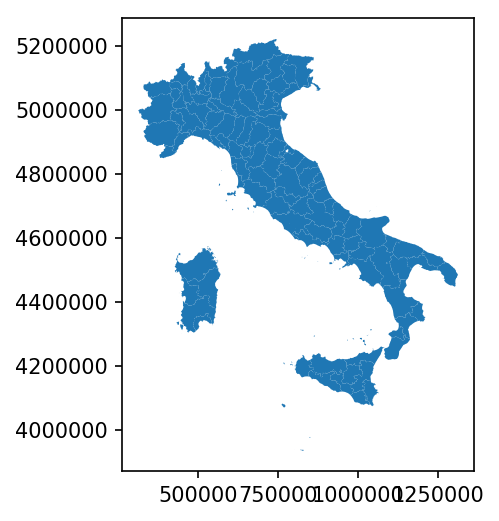

In [16]:
merged_prov = pd.merge(map_pr, highest_party_by_prov, on='desc_pr')
merged_prov.plot()

We check that the merged dataframe is of the correct size (which is 107, the number of italian provinces that we obtained earlier).

In [17]:
len(merged_prov)

107

We perform a merge of the map data for the single main parties.

In [18]:
merged_all_lg = pd.merge(map_pr, results_lg, on='desc_pr')
merged_all_pd = pd.merge(map_pr, results_pd, on='desc_pr')
merged_all_m5s = pd.merge(map_pr, results_m5s, on='desc_pr')
merged_all_fi = pd.merge(map_pr, results_fi, on='desc_pr')

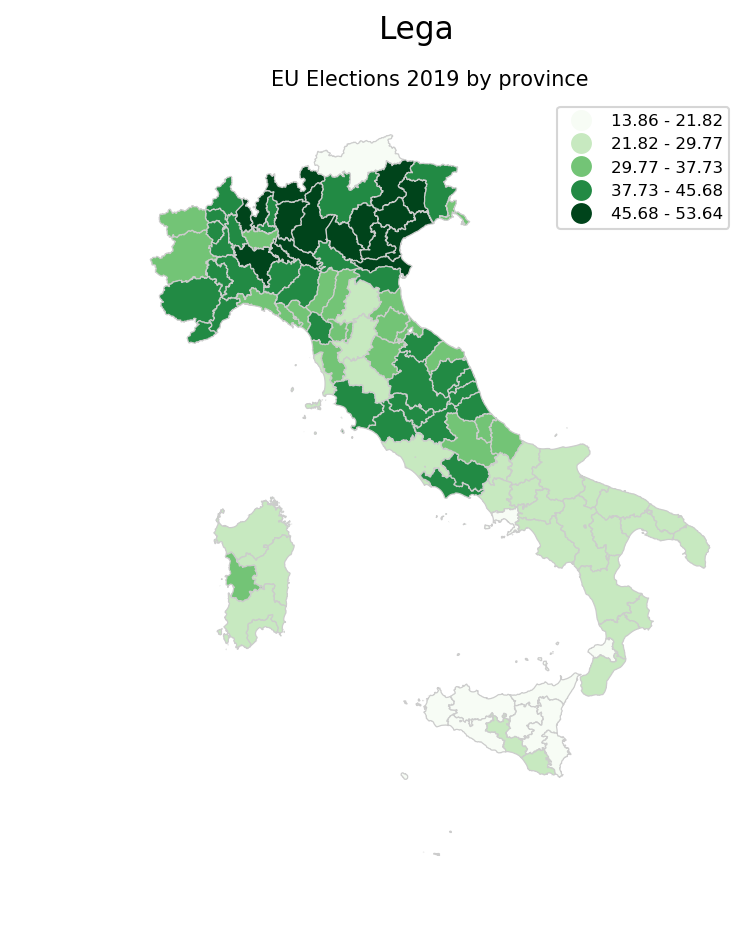

In [19]:
variable = 'perc'
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.axis('off')
normalize = matplotlib.colors.Normalize(vmin=0, vmax=2)

plt.suptitle('Lega',fontsize=15, y=0.96)
plt.title('EU Elections 2019 by province',fontsize=10)


merged_all_lg.plot(column=variable, cmap='Greens', scheme='equal_interval', linewidth=0.6, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'fontsize': 8})

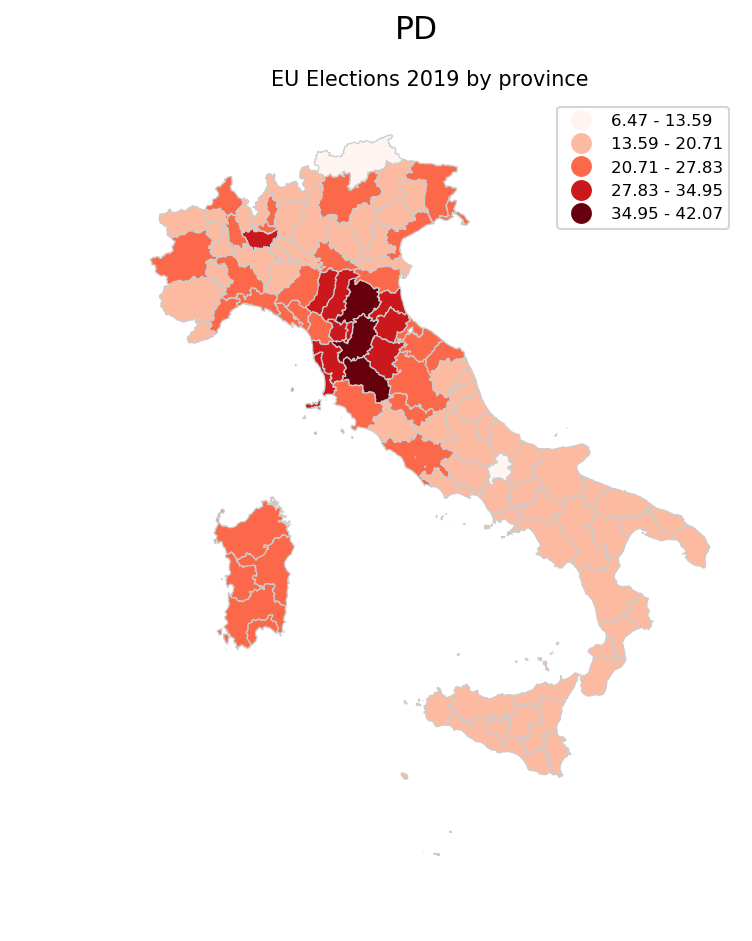

In [20]:
variable = 'perc'
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.axis('off')

plt.suptitle('PD',fontsize=15, y=0.96)
plt.title('EU Elections 2019 by province',fontsize=10)

merged_all_pd.plot(column=variable, cmap='Reds', scheme='equal_interval', linewidth=0.6, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'fontsize': 8})

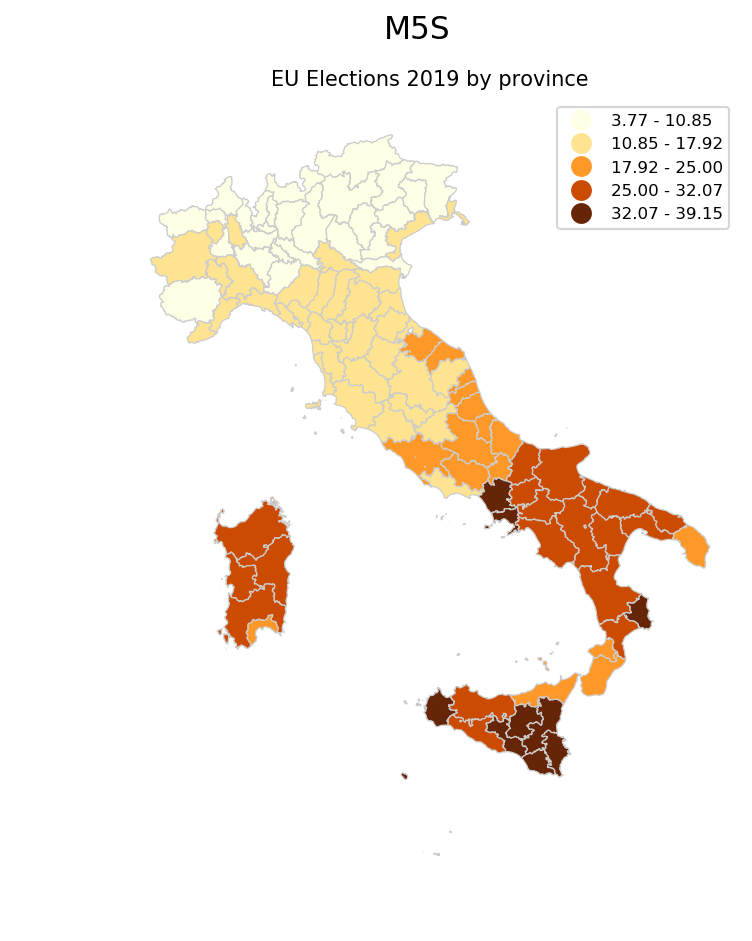

In [21]:
variable = 'perc'
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.axis('off')

plt.suptitle('M5S',fontsize=15, y=0.96)
plt.title('EU Elections 2019 by province',fontsize=10)

merged_all_m5s.plot(column=variable, cmap='YlOrBr', scheme='equal_interval', linewidth=0.6, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'fontsize': 8})

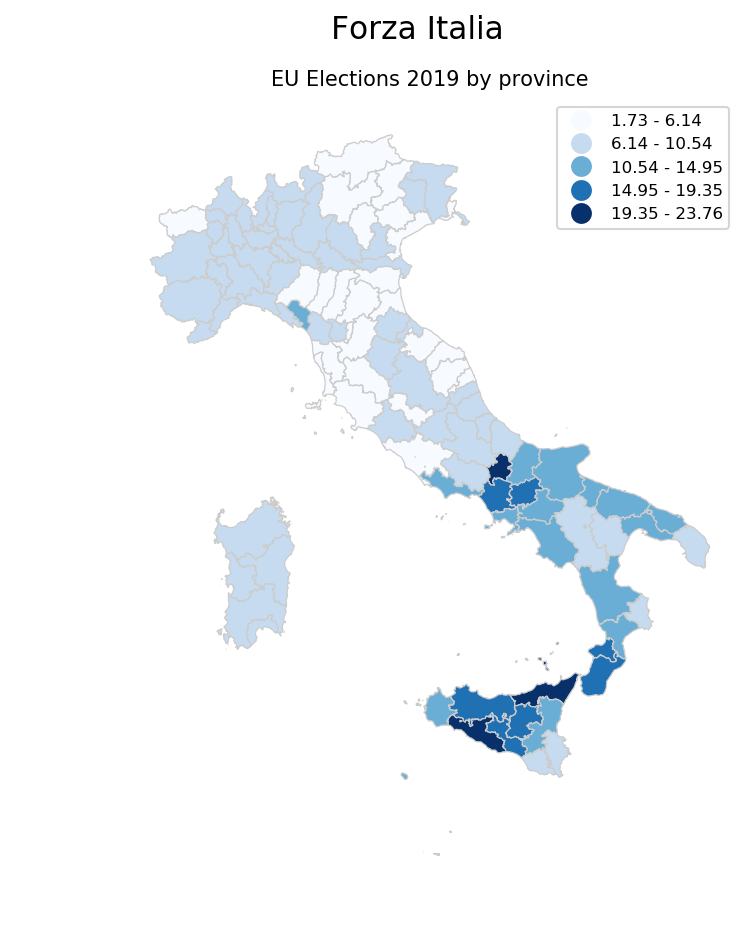

In [22]:
variable = 'perc'
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.axis('off')

plt.suptitle('Forza Italia',fontsize=15, y=0.96)
plt.title('EU Elections 2019 by province',fontsize=10)

merged_all_fi.plot(column=variable, cmap='Blues', scheme='equal_interval', linewidth=0.6, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'fontsize': 8})

We can plot the previous maps in the same image, to make comparisons easier.

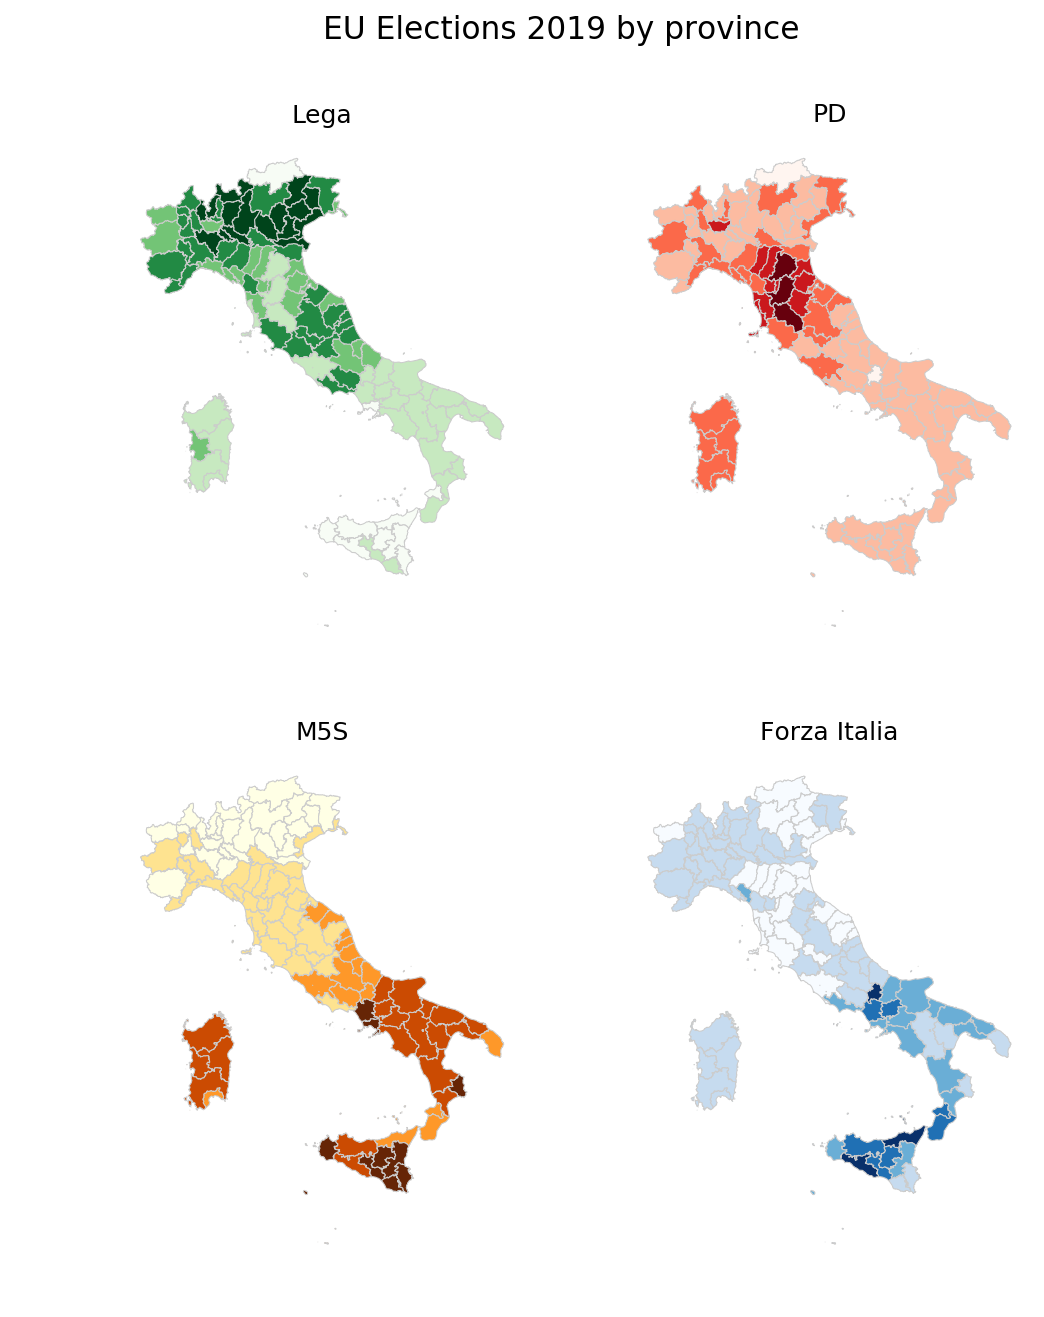

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(8, 10))

variable = 'perc'

plt.suptitle('EU Elections 2019 by province',fontsize=15, y=0.96)

axs[0, 0].axis('off')
axs[0, 1].axis('off')
axs[1, 0].axis('off')
axs[1, 1].axis('off')

axs[0, 0].set_title('Lega')
axs[0, 1].set_title('PD')
axs[1, 0].set_title('M5S')
axs[1, 1].set_title('Forza Italia')

lwidth = 0.5

merged_all_lg.plot(column=variable, cmap='Greens', scheme='equal_interval', linewidth=lwidth, ax=axs[0, 0], edgecolor='0.8')
merged_all_pd.plot(column=variable, cmap='Reds', scheme='equal_interval', linewidth=lwidth, ax=axs[0, 1], edgecolor='0.8')
merged_all_m5s.plot(column=variable, cmap='YlOrBr', scheme='equal_interval', linewidth=lwidth, ax=axs[1, 0], edgecolor='0.8')
merged_all_fi.plot(column=variable, cmap='Blues', scheme='equal_interval', linewidth=lwidth, ax=axs[1, 1], edgecolor='0.8')

This final map shows, for each province, the party which got most voted.

In [24]:
merged_top_lg = merged_prov[merged_prov['desc_lis'].isin(['LEGA SALVINI PREMIER'])]
merged_top_pd = merged_prov[merged_prov['desc_lis'].isin(['PARTITO DEMOCRATICO'])]
merged_top_m5s = merged_prov[merged_prov['desc_lis'].isin(['MOVIMENTO 5 STELLE'])]
merged_top_others = merged_prov[~merged_prov['desc_lis'].isin(['LEGA SALVINI PREMIER','PARTITO DEMOCRATICO','MOVIMENTO 5 STELLE'])]

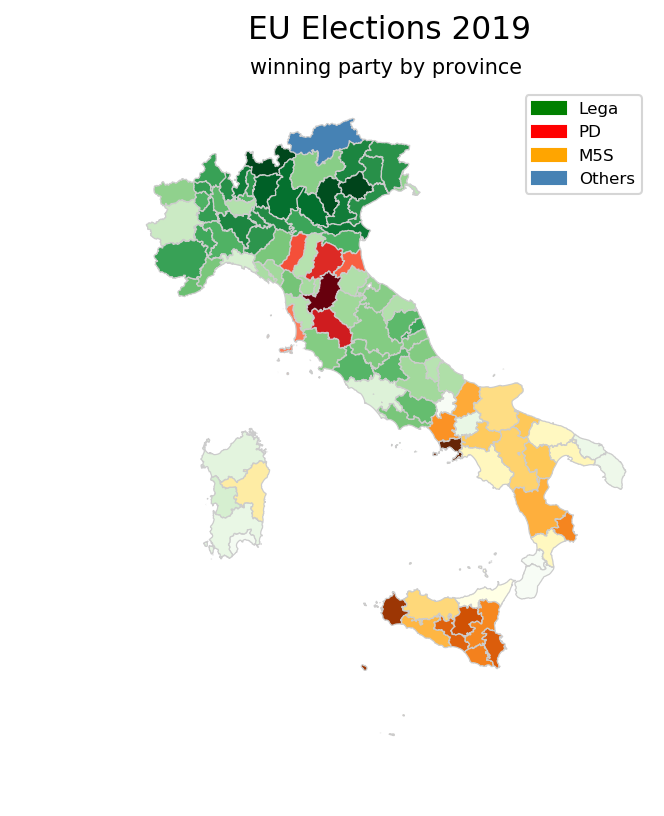

In [25]:
fig, ax = plt.subplots(1, figsize=(10, 6))

ax.axis('off')

plt.suptitle('EU Elections 2019',fontsize=15, y=0.96, x=0.515)
plt.title('winning party by province',fontsize=10)


legend_dict = { 'Lega' : 'green', 'PD' : 'red', 'M5S' : 'orange', 'Others' : 'steelblue' }
patchList = []
for key in legend_dict:
        data_key = matplotlib.patches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList, fontsize=8)

vmin = 25

settings = {'column' : 'perc', 'vmin' : 25, 'linewidth' : 0.6, 'ax' : ax, 'edgecolor' : '0.8'}

merged_top_lg.plot(cmap='Greens', **settings)
merged_top_pd.plot(cmap='Reds', **settings)
merged_top_m5s.plot(cmap='YlOrBr', **settings)
merged_top_others.plot(color='steelblue', linewidth=0.6, ax=ax, edgecolor='0.8')